# Assignment-2 | Sahil Sareen RA1911003010464

### 18CSE398J Machine Learning - Core Concepts with Applications

#### Performing Logistic Regression on Equity Apartments Dataset from Assignment-1

***

### Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

file = 'Equity_Apartments_Data.csv'
df = pd.read_csv(file, nrows=1000)

### Data cleaning

In [2]:
to_drop = ['Northern_Exposure',
           'Southern_Exposure',
           'Eastern_Exposure',
           'Western_Exposure',
           'City_Skyline',
           'Kitchen_Island',
           'Stainless_Appliances']

df.drop(to_drop, inplace = True, axis = 1)

#### Columns that were not of much use are dropped.

## Data Exploration

In [3]:
Beds = df[df.Beds==1]
Beds.shape

(493, 14)

In [4]:
NoBeds = df[df.Beds==0]
NoBeds.shape

(186, 14)

In [5]:
df.groupby('Beds').mean()

,Price,Baths,sq.ft,Floor,Units,Balcony,Walk_In_Closet,Fireplace,Renovated,Office_Space,Days_Till_Available,Estimated_Vacancy
Beds,,,,,,,,,,,,
0,2526.693548,1.000000,525.709677,13.284946,343.145161,0.107527,0.037634,0.010753,0.096774,0.000000,26.462366,0.051394
1,3292.010142,1.011156,737.113590,10.561866,311.892495,0.125761,0.141988,0.012170,0.144016,0.008114,33.687627,0.107733
2,4382.082474,1.943299,1112.079038,10.481100,306.529210,0.199313,0.305842,0.051546,0.137457,0.006873,41.446735,0.129058
3,4983.333333,2.083333,1390.566667,8.366667,341.300000,0.100000,0.200000,0.166667,0.233333,0.000000,33.800000,0.034297


<AxesSubplot:xlabel='Beds', ylabel='Floor'>

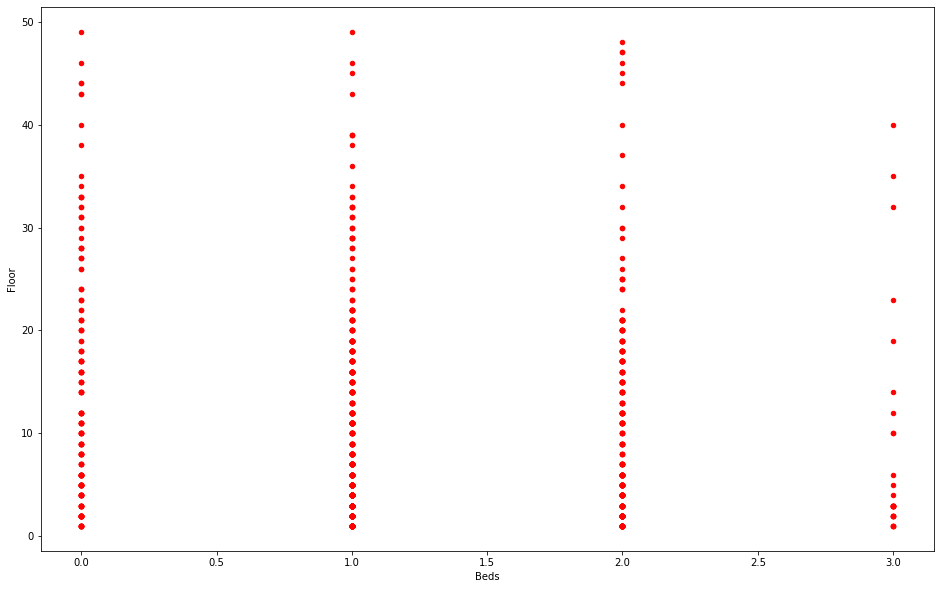

In [6]:
df.plot.scatter('Beds','Floor',color='red', figsize=(16, 10))

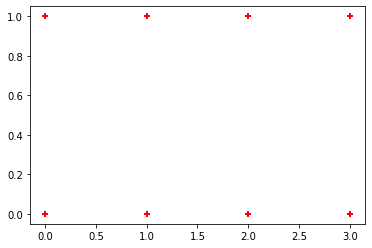

In [7]:
plt.scatter(df.Beds,df.Balcony,marker='+',color='red')

<AxesSubplot:xlabel='Units', ylabel='Floor'>

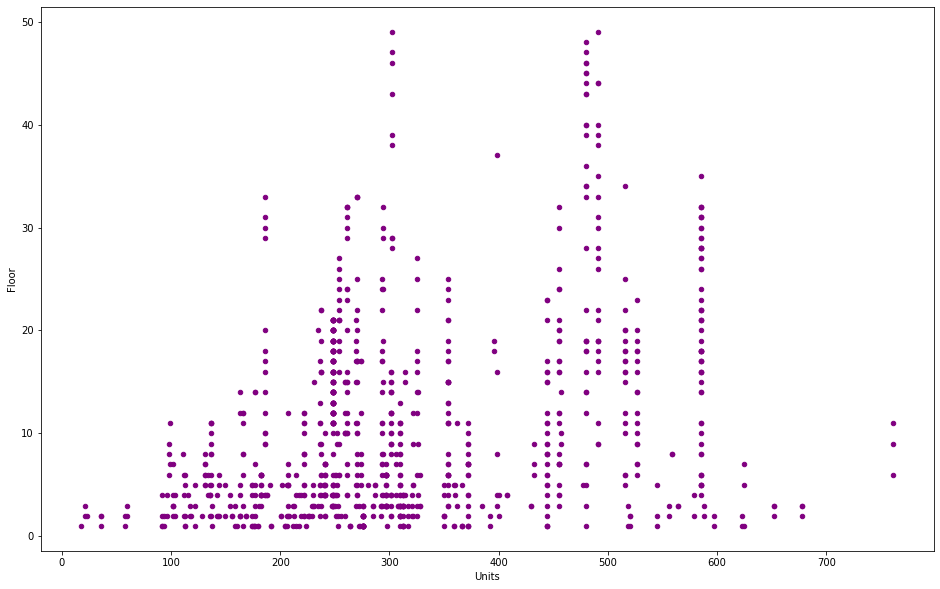

In [8]:
df.plot.scatter('Units', 'Floor', figsize=(16, 10), color='purple')

Text(0, 0.5, 'Frequency')

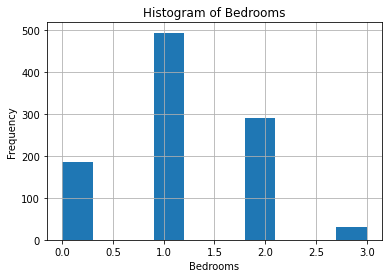

In [9]:
df.Beds.hist()
plt.title('Histogram of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

#### It is observed that properties with a single bedroom are most common.

<AxesSubplot:xlabel='Beds'>

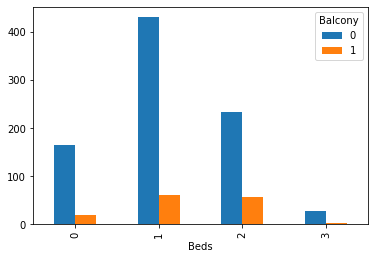

In [10]:
pd.crosstab(df.Beds,df.Balcony).plot(kind='bar')

#### It is observed that properties with a double bedroom have a higher chance of also having a balcony.

<AxesSubplot:xlabel='Balcony'>

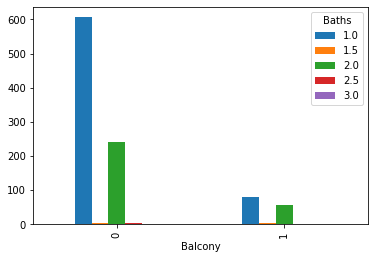

In [11]:
pd.crosstab(df.Balcony,df.Baths).plot(kind='bar')

<AxesSubplot:xlabel='City'>

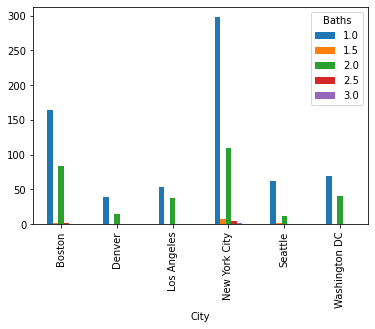

In [12]:
pd.crosstab(df.City,df.Baths).plot(kind='bar')

#### It is observed that in New York, most properties have alteast a single bathroom.

In [13]:
df2 = df.rename(columns = {'sq.ft': 'sqft'}, inplace = False)

<AxesSubplot:xlabel='Renovated'>

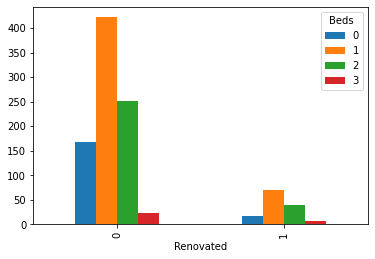

In [14]:
pd.crosstab(df.Renovated,df.Beds).plot(kind='bar')

<AxesSubplot:xlabel='City'>

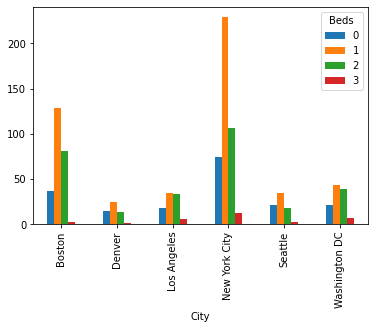

In [15]:
pd.crosstab(df.City,df.Beds).plot(kind='bar')

#### It is observed that in New York, properties with a single bedroom are most common.

Text(0, 0.5, 'Proportion')

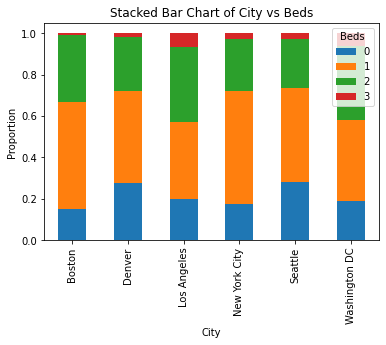

In [16]:
table=pd.crosstab(df.City,df.Beds)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of City vs Beds')
plt.xlabel('City')
plt.ylabel('Proportion')

## Data Selection

In [17]:
subdf = df[['Baths','Floor','Beds','Office_Space','Balcony','City','Price']]
subdf.head()

,Baths,Floor,Beds,Office_Space,Balcony,City,Price
0,1.0,5,0,0,0,Washington DC,2377
1,1.0,2,1,0,0,Washington DC,2816
2,2.0,6,2,0,0,Washington DC,3811
3,1.0,2,0,0,0,Washington DC,1549
4,1.0,3,1,0,0,Washington DC,1753


In [18]:
City_dummies = pd.get_dummies(subdf.City, prefix="City")

In [19]:
df_with_dummies = pd.concat([subdf,City_dummies],axis='columns')

In [20]:
df_with_dummies.head()

,Baths,Floor,Beds,Office_Space,Balcony,City,Price,City_Boston,City_Denver,City_Los Angeles,City_New York City,City_Seattle,City_Washington DC
0,1.0,5,0,0,0,Washington DC,2377,0,0,0,0,0,1
1,1.0,2,1,0,0,Washington DC,2816,0,0,0,0,0,1
2,2.0,6,2,0,0,Washington DC,3811,0,0,0,0,0,1
3,1.0,2,0,0,0,Washington DC,1549,0,0,0,0,0,1
4,1.0,3,1,0,0,Washington DC,1753,0,0,0,0,0,1


In [21]:
df_with_dummies.drop('City',axis='columns',inplace=True)
df_with_dummies.head()

,Baths,Floor,Beds,Office_Space,Balcony,Price,City_Boston,City_Denver,City_Los Angeles,City_New York City,City_Seattle,City_Washington DC
0,1.0,5,0,0,0,2377,0,0,0,0,0,1
1,1.0,2,1,0,0,2816,0,0,0,0,0,1
2,2.0,6,2,0,0,3811,0,0,0,0,0,1
3,1.0,2,0,0,0,1549,0,0,0,0,0,1
4,1.0,3,1,0,0,1753,0,0,0,0,0,1


## Model Building

In [22]:
X = df_with_dummies
X.head()

,Baths,Floor,Beds,Office_Space,Balcony,Price,City_Boston,City_Denver,City_Los Angeles,City_New York City,City_Seattle,City_Washington DC
0,1.0,5,0,0,0,2377,0,0,0,0,0,1
1,1.0,2,1,0,0,2816,0,0,0,0,0,1
2,2.0,6,2,0,0,3811,0,0,0,0,0,1
3,1.0,2,0,0,0,1549,0,0,0,0,0,1
4,1.0,3,1,0,0,1753,0,0,0,0,0,1


In [23]:
y = df.Beds

#### y is our target variable that is the number of bedrooms.

In [24]:
print(y)

0      0
1      1
2      2
3      0
4      1
      ..
995    2
996    2
997    2
998    2
999    2
Name: Beds, Length: 1000, dtype: int64


### Model Fitting

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [27]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [28]:
model.predict(X_test)

array([1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 3, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1,
       2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 3, 0, 3, 1, 2, 1, 1, 0, 0,
       1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 3, 1, 0, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1,

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 3, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1,
       2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 3, 0, 3, 1, 2, 1, 1, 0, 0,
       1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 3, 1, 0, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1,

In [31]:
model.coef_

array([[ 9.19967717e-01,  5.64042715e-02, -5.12747121e+00,
         0.00000000e+00, -1.36462728e-01, -6.93145927e-04,
         2.88947557e-01,  1.35824630e-01,  2.30825947e-01,
         5.90807512e-01,  1.79002481e-01, -1.47261068e-01],
       [-2.50975533e+00,  1.59457753e-02, -6.39760227e-02,
         0.00000000e+00,  3.16828982e-01, -1.22927588e-04,
         4.20693479e-01, -1.99524264e-02, -2.21403645e-01,
         2.31645549e-01, -1.07751307e-01, -3.46856397e-01],
       [ 2.38386579e+00, -1.48152441e-02,  1.27910059e+00,
         0.00000000e+00, -2.69829533e-01,  1.56727006e-04,
         2.51037489e-01, -1.24944392e-01,  9.32082947e-02,
        -1.97329289e-01,  5.60321097e-02,  6.16173110e-01],
       [-7.94078177e-01, -5.75348027e-02,  3.91234664e+00,
         0.00000000e+00,  8.94632792e-02,  6.59346507e-04,
        -9.60678526e-01,  9.07218830e-03, -1.02630597e-01,
        -6.25123773e-01, -1.27283284e-01, -1.22055645e-01]])

In [32]:
model.intercept_

array([ 5.39372331,  6.0446717 , -4.11015886, -7.32823616])

Text(0, 0.5, 'Predicted Y')

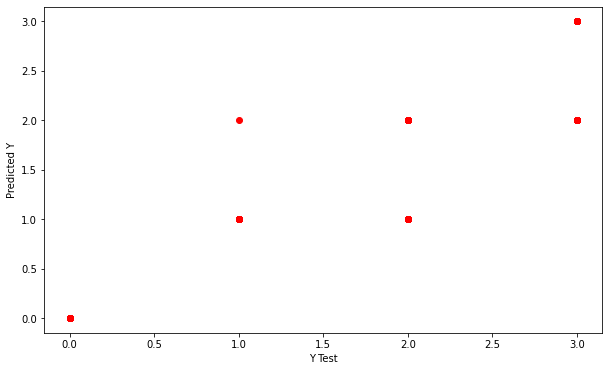

In [33]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[142,   0,   0,   0],
       [  0, 333,   1,   0],
       [  0,  13, 190,   0],
       [  0,   0,  12,   9]], dtype=int64)

#### Accuracy

In [35]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


 ## Model evaluation

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.037142857142857144
MSE: 0.037142857142857144
RMSE: 0.19272482233188631


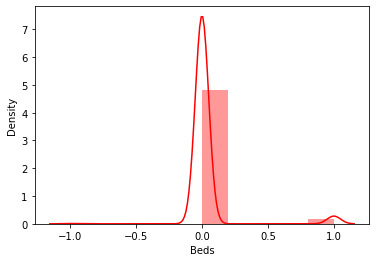

In [37]:
import seaborn as sns

sns.distplot((y_test-y_pred),bins=10, color='r');

### K-fold model validation

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
scores

array([0.93492408, 0.93785603, 0.90506329, 0.87341772, 0.89649224])

In [39]:
len(X_train.columns)

12

In [40]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 12))}]

model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)
rfe = RFE(model)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression(max_iter=10000)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             return_train_score=True, scoring='r2', verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.866800,0.217061,0.000000,0.000000,1,{'n_features_to_select': 1},0.937856,0.968354,0.964706,0.929036,...,0.942515,0.021247,1,0.943088,0.935266,0.936875,0.944691,0.950304,0.942045,0.005458
1,1.902275,0.226385,0.003125,0.006251,2,{'n_features_to_select': 2},0.937856,0.968354,0.929412,0.893554,...,0.916709,0.039238,7,0.910566,0.959541,0.968438,0.920988,0.933738,0.938654,0.022129
2,1.878426,0.215173,0.000000,0.000000,3,{'n_features_to_select': 3},0.937856,0.968354,0.929412,0.893554,...,0.916709,0.039238,7,0.910566,0.959541,0.960547,0.920988,0.933738,0.937076,0.020141
3,1.894225,0.221302,0.000000,0.000000,4,{'n_features_to_select': 4},0.937856,0.968354,0.929412,0.893554,...,0.916709,0.039238,7,0.910566,0.951450,0.960547,0.920988,0.933738,0.935458,0.018532
4,1.853288,0.221038,0.003125,0.006250,5,{'n_features_to_select': 5},0.937856,0.968354,0.929412,0.893554,...,0.916709,0.039238,7,0.926827,0.951450,0.960547,0.920988,0.933738,0.938710,0.014961
5,1.850369,0.223578,0.000000,0.000000,6,{'n_features_to_select': 6},0.937856,0.968354,0.929412,0.893554,...,0.916709,0.039238,7,0.926827,0.951450,0.960547,0.936790,0.933738,0.941870,0.012319
6,1.846674,0.221245,0.000285,0.000571,7,{'n_features_to_select': 7},0.937856,0.968354,0.929412,0.929036,...,0.923805,0.037583,2,0.934957,0.935266,0.960547,0.944691,0.933738,0.941840,0.010142
7,1.788982,0.210315,0.000000,0.000000,8,{'n_features_to_select': 8},0.937856,0.968354,0.929412,0.929036,...,0.923805,0.037583,2,0.934957,0.943358,0.960547,0.944691,0.933738,0.943458,0.009595
8,1.812067,0.230460,0.001400,0.000490,9,{'n_features_to_select': 9},0.937856,0.968354,0.929412,0.929036,...,0.923805,0.037583,2,0.934957,0.943358,0.960547,0.944691,0.933738,0.943458,0.009595
9,1.794841,0.224799,0.003125,0.006250,10,{'n_features_to_select': 10},0.937856,0.968354,0.929412,0.929036,...,0.923805,0.037583,2,0.934957,0.943358,0.952656,0.944691,0.933738,0.941880,0.006934


In [42]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits= 5)
modelCV = LogisticRegression(solver='lbfgs', max_iter=10000)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("K-fold cross validation average accuracy: %.3f" % (results.mean()))

K-fold cross validation average accuracy: 0.953


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.96      1.00      0.98       334
           2       0.94      0.94      0.94       203
           3       1.00      0.43      0.60        21

    accuracy                           0.96       700
   macro avg       0.97      0.84      0.88       700
weighted avg       0.96      0.96      0.96       700



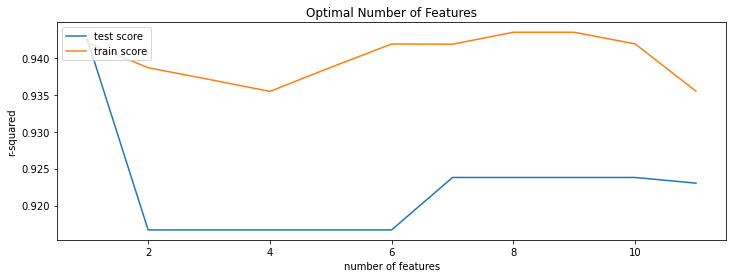

In [50]:
plt.figure(figsize=(12,4))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')